https://mset.space - платформа для проведения анализа данных, построения моделей и внедрения моделей в продукцию.


https://mset.space - platform for data analysis, model building and implementation into production.


Ноутбуки для платформы mset.space
https://github.com/MindSetLib/MS-Education

Low code ML - библиотека машинного обучения
https://github.com/MindSetLib/Insolver


Телеграм канал платформы
https://t.me/msetspace

Связь с разработчиками:
telegram: @frankshikhaliev
email: request@mind-set.ru

# Evidently
[evidently](https://github.com/evidentlyai/evidently?)


* Библиотека позволяет формировать отчеты в виде дашбордов, в версии 0.1.4 доступны три варианты отчета: Data Drift, Numerical Target Drift, Categorical Target Drift, т.е. измнение распределения признаков в данных, изменение распределения вещественной (задача регрессии) и категориальной (задача классификации) целевой переменной соответственно. 
* Основой для обзора послужили примеры из папки examples прокета на github, а также [блог разработчиков](https://evidentlyai.com/blog)
* Интерактивные дашборды хранятся в папке reports. Если отчет не загружется, нужно нажать "trust html"

#### 0. Установка

In [1]:
!pip install evidently

In [2]:
!pip freeze | grep evidently

evidently==0.1.4.dev0


In [3]:
#импорт необходимых библиотек
import pandas as pd
import numpy as np
from sklearn import datasets

from evidently.dashboard import Dashboard # создает отчет
from evidently.tabs import DriftTab, NumTargetDriftTab, CatTargetDriftTab
# виды дашбордов, передаются в параметр tabs (Dashboard)

#### 1. Data Drift
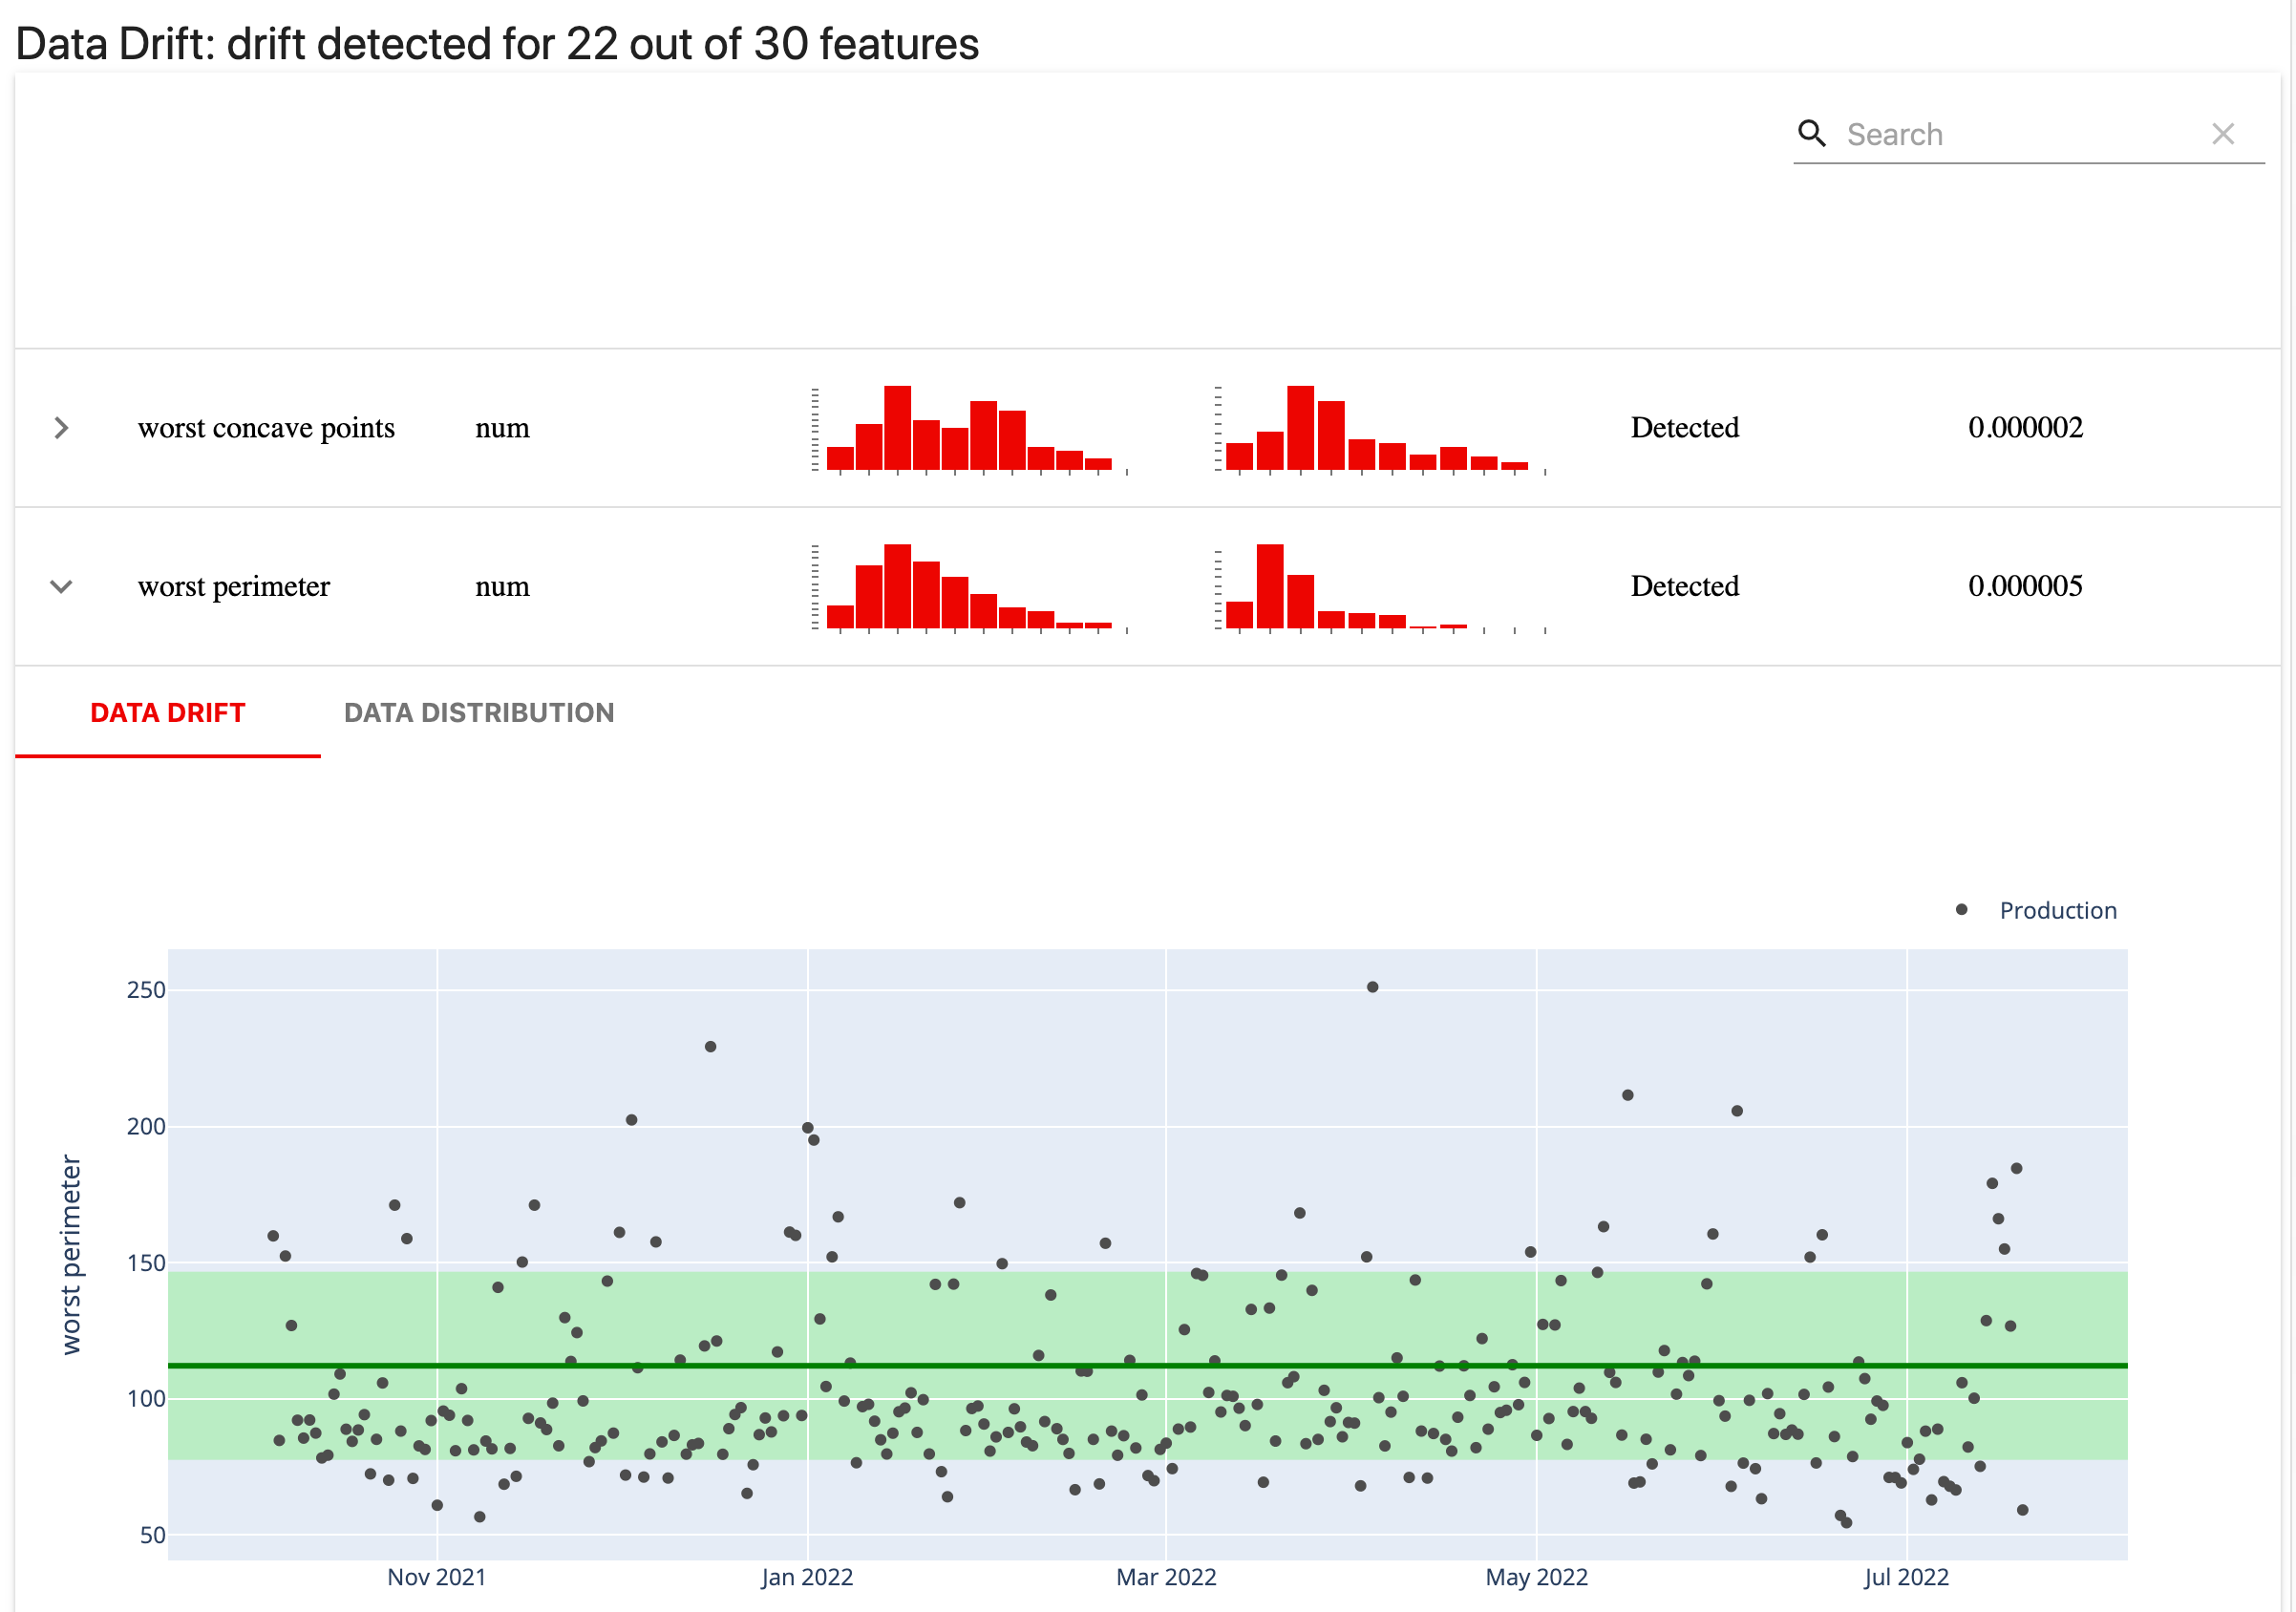

In [4]:
# загрузка набора данных о жилье в Бостоне
boston = datasets.load_boston()
boston_frame = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# Dashboard(эталонные данные (обучение), новые данные, дашборд data drift)
# Как работает DriftTab: сравнение распределения каждого отдельного признака в двух наборрах данных 
# с помощью статистических тестов (Колмогорова-Смирнова и Хи-квадрат для вещественных и категориальных признаков соответственно)
# с уровнем доверия 0.95
boston_data_drift_report = Dashboard(boston_frame[:200], boston_frame[200:], tabs=[DriftTab]) # создание отчета
boston_data_drift_report.save('reports/boston_data_drift_no_mapping.html') #сохранение дашборда в html файл

Все графики интерактивные, так что их можно двигать, зумировать, сохранять в виде изображения

Так как библиотека работает только с числовыми данными, для корректной работы с категориальными признаками требуется их закодировать с помощью [numerical label](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html), но возможно применять и другие стратегии кодировки (например, [OneHotEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder))

In [6]:
# маппинг позволяет явно определить служебные столбцы (utility columns: pdediction, id и target) датафрейма, 
# а также выделить категориальные и вещественные признаки 
# pdediction, id и target не входят в дашборд data dridt
column_mapping = {}

column_mapping['target'] = 'target' # целевой признак
column_mapping['prediction'] = None # предсказание модели
column_mapping['datetime'] = None # столбец типа datetime

column_mapping['numerical_features'] = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
                                        'PTRATIO', 'B', 'LSTAT'] # вещественные признаки
column_mapping['categorical_features'] = ['CHAS', 'RAD'] #категориальные признаки (изначально в виде numerical labels)

In [7]:
# здесь и далее при создании отчетов используется явно заданный маппинг
boston_data_drift_report = Dashboard(boston_frame[:200], boston_frame[200:], column_mapping = column_mapping, 
                                     tabs=[DriftTab])
boston_data_drift_report.save('reports/boston_data_drift.html')

In [8]:
# в Jupyter есть возможность просматривать дашборд прямо в ноутбуке
#boston_data_drift_report.show() # на сервере пока не работает

#### 2. Numerical Target Drift
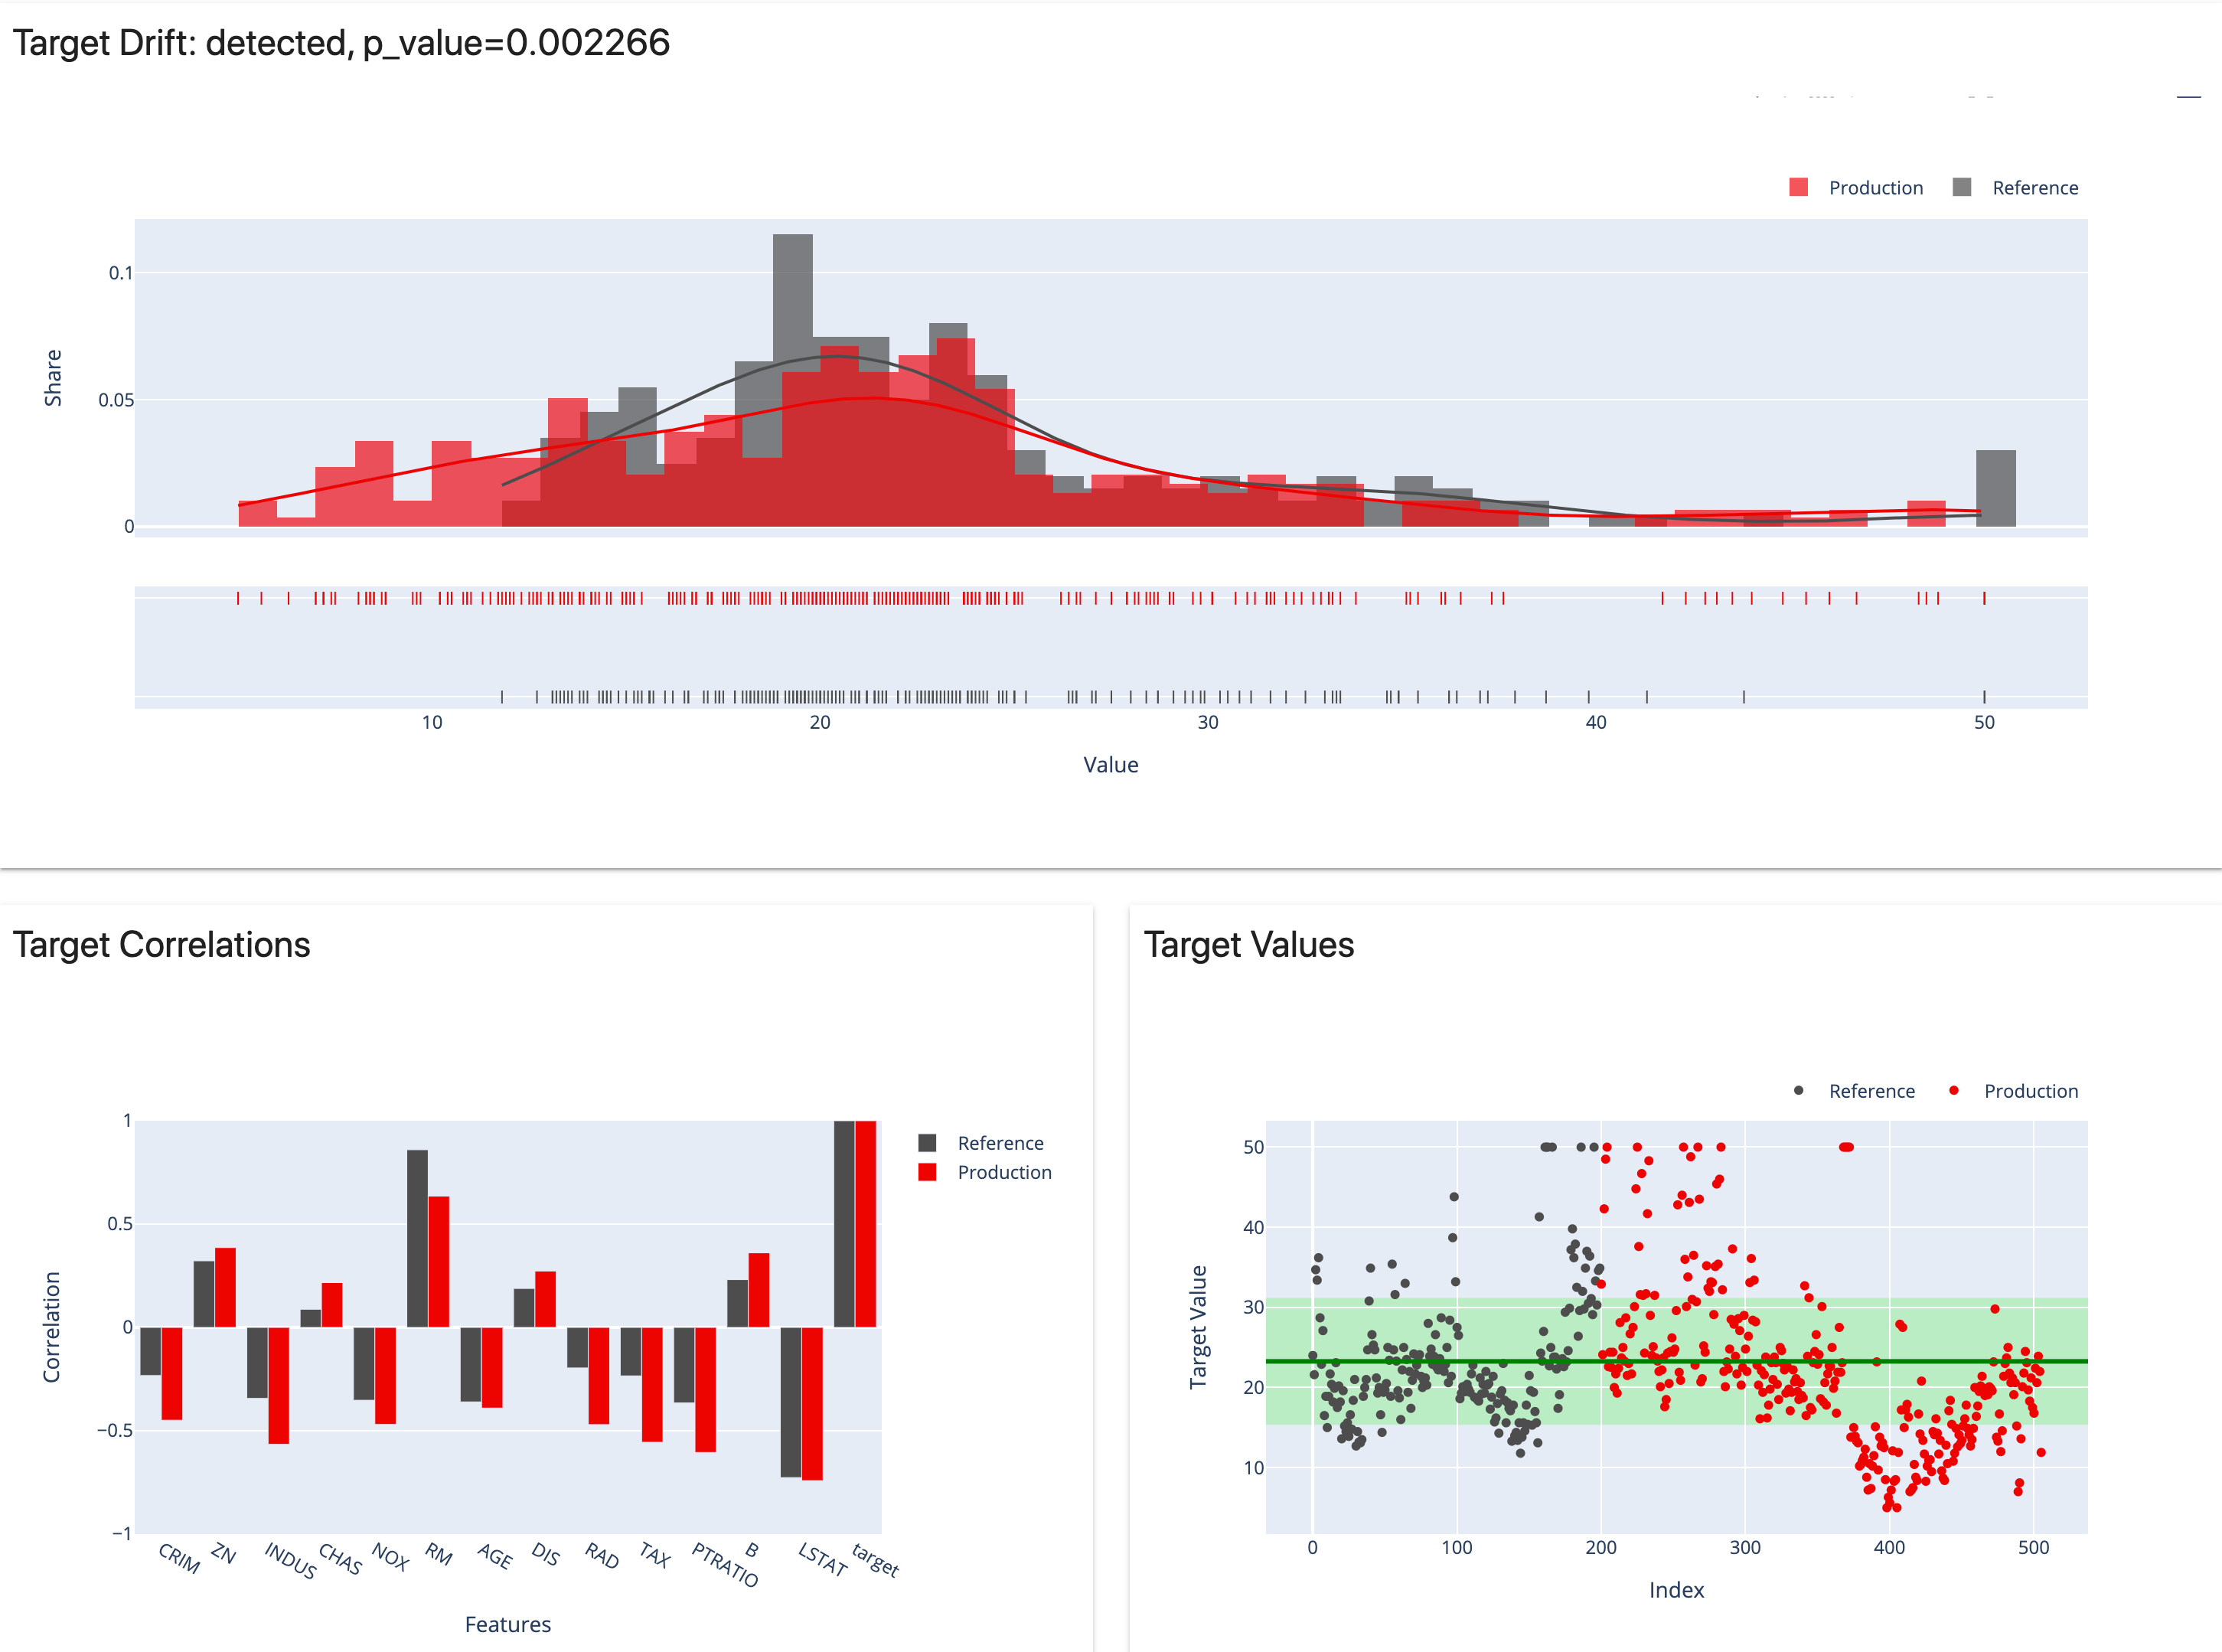

In [9]:
# для tareget drift должен быть указать target или prediction (или оба)
boston_frame['target'] = boston.target # добавление целевого признака

In [10]:
# Как работает NumTargetDriftTab: сравнение распределения таргета в двух датасетах с помощью стат. теста Колмогорова-Смирнова
# с уровнем доверия 0.95, также вычисляется корреляция Пирсона таргета с каждым признаком (для обоих датасетов)
boston_num_target_drift_report = Dashboard(boston_frame[:200], boston_frame[200:], column_mapping = column_mapping, 
                                     tabs=[NumTargetDriftTab])
boston_num_target_drift_report.save('reports/boston_num_target_drift.html')

Для target drift есть возможность посмотреть на графики датасетов в отдельности

#### 3. Categorical Target Drift
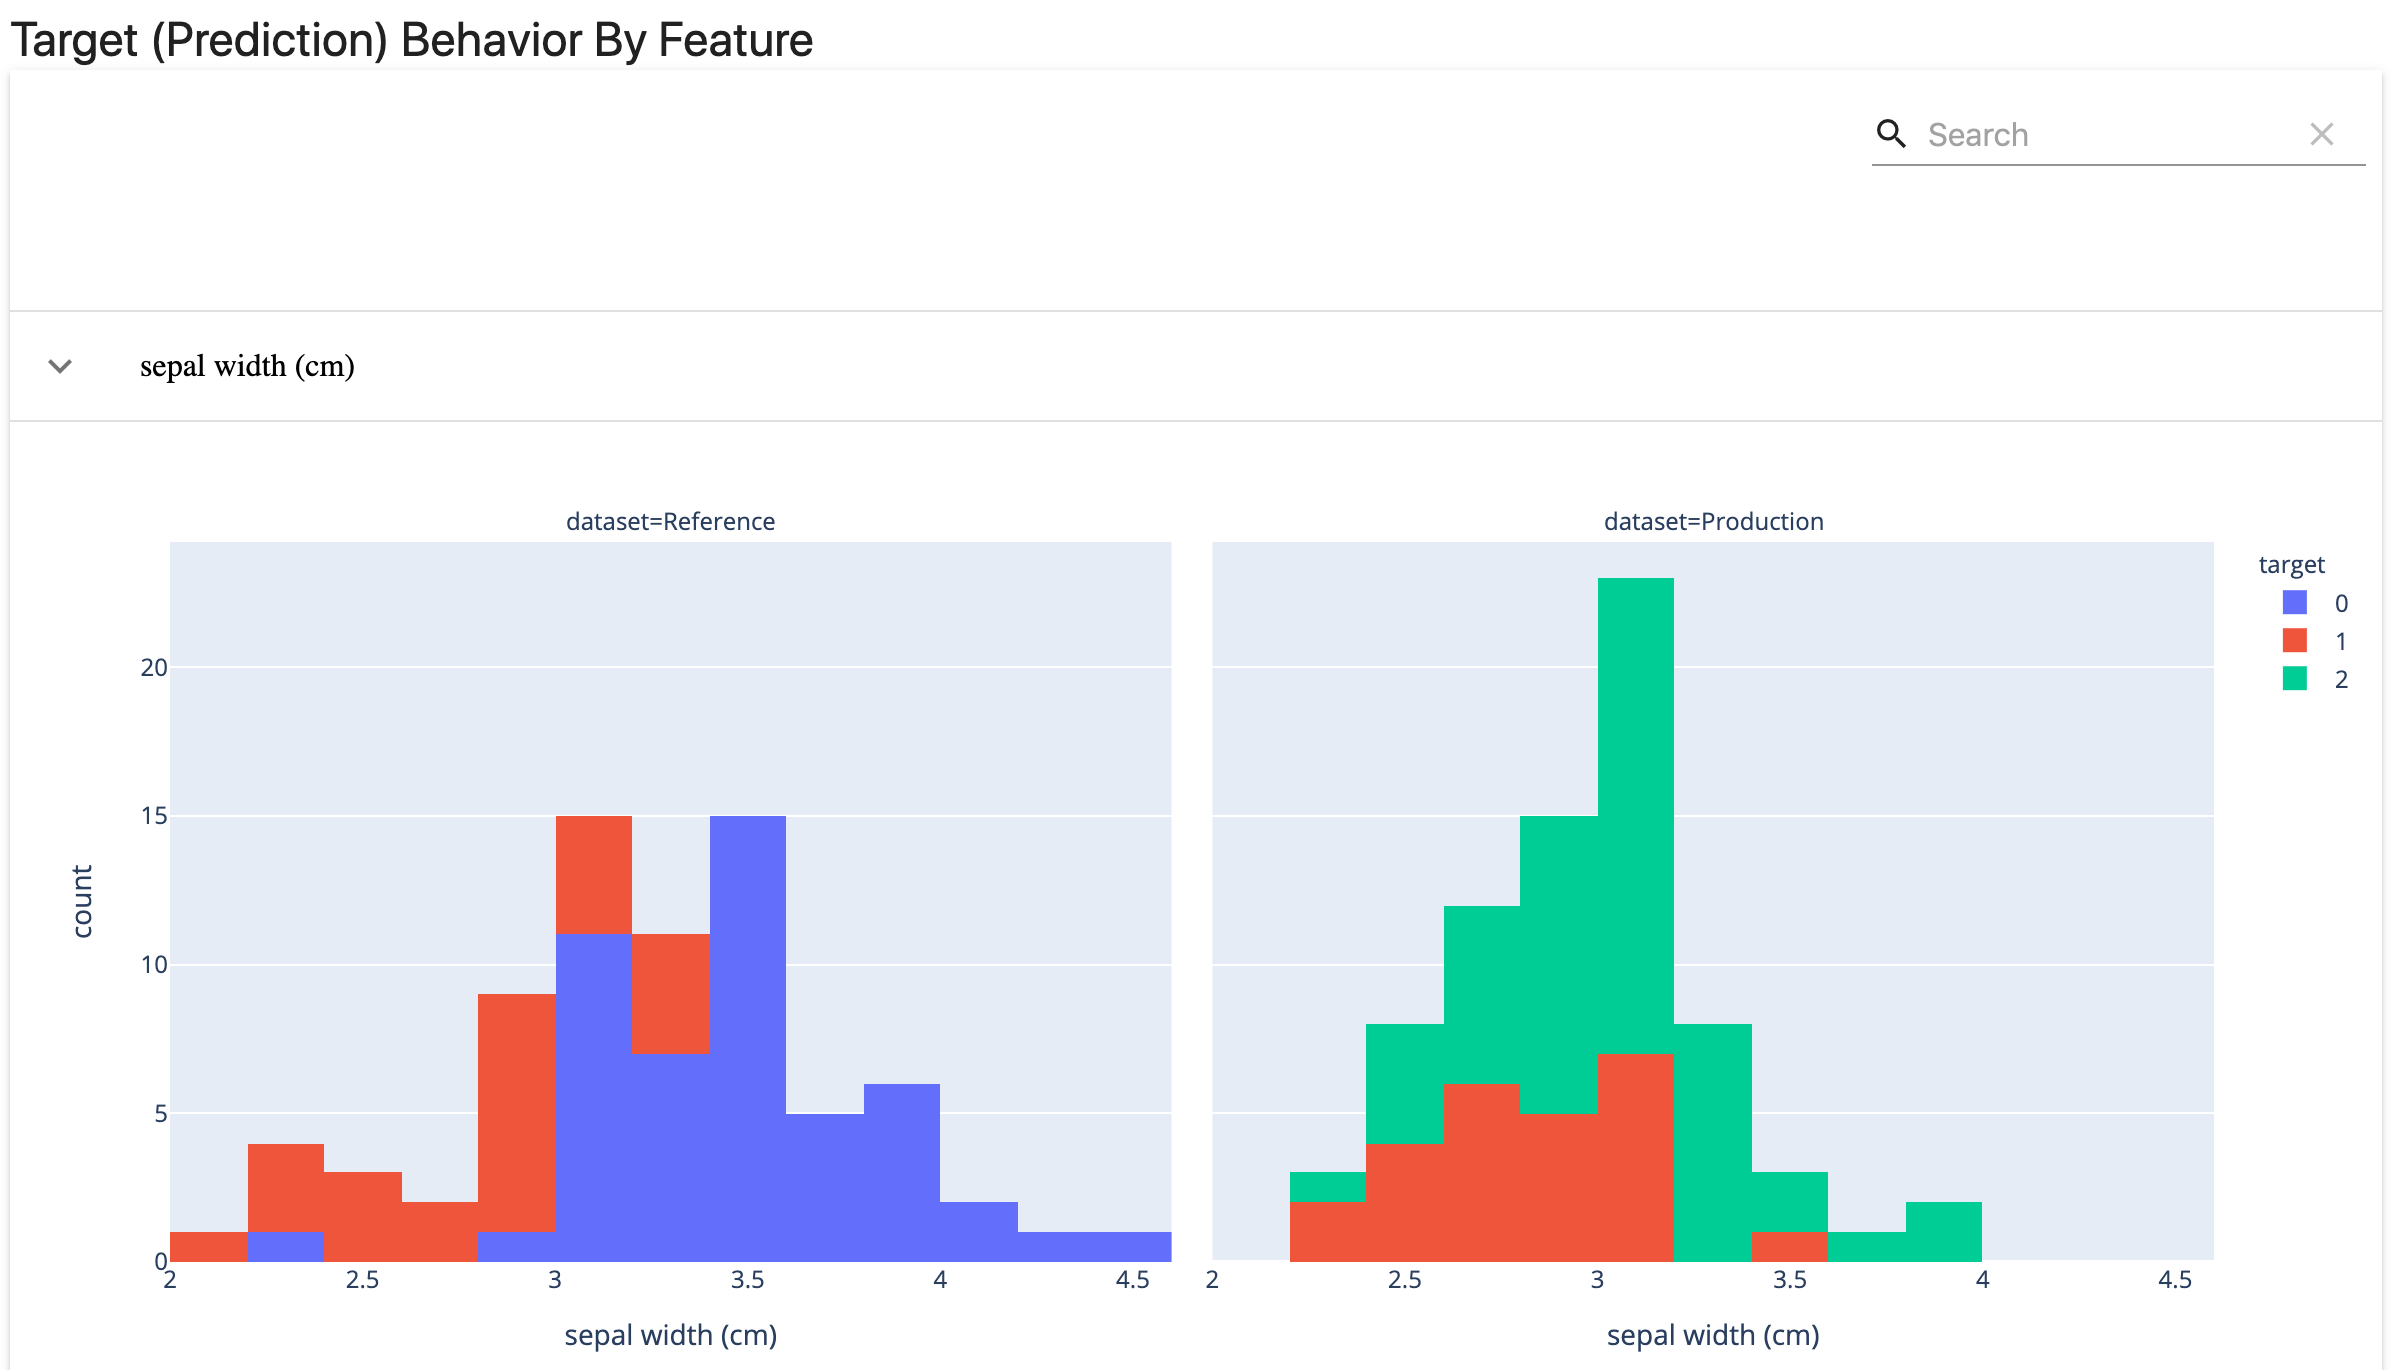

In [11]:
# загрузка датасета рак молочной железы
bcancer = datasets.load_breast_cancer()
bcancer_frame = pd.DataFrame(bcancer.data, columns = bcancer.feature_names)
bcancer_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
# маппинг
column_mapping_bcancer = {}

column_mapping_bcancer['target'] = 'target' # целевая метка

numerical_features_bcancer = list(bcancer_frame.columns) # вещественные признаки
column_mapping_bcancer['numerical_features'] = numerical_features_bcancer

In [13]:
bcancer_frame['target'] = bcancer.target # добавление целевого признака

In [14]:
# Как работает CatTargetDriftTab: сравнение распределения таргета в двух датасетах в с поиощью хи-квадрат теста
# с уровнем доверия 0.95 (проверка на наличие существенных различий). Также вычисляются распределение таргета на каждом из признаков 
# для обоих датасетов.
bcancer_cat_target_drift = Dashboard(bcancer_frame[:280], bcancer_frame[280:], column_mapping = column_mapping_bcancer,
                               tabs=[CatTargetDriftTab])
bcancer_cat_target_drift.save('reports/bcancer_cat_target_drift.html')

In [15]:
# создание двух дашбордов в одном отчете
bcancer_data_and_cat_target_drift = Dashboard(bcancer_frame[:280], bcancer_frame[280:], column_mapping = column_mapping_bcancer,
                               tabs=[DriftTab, CatTargetDriftTab])
bcancer_data_and_cat_target_drift.save('reports/bcancer_data_and_cat_target_drift.html')

Советы по использованию из [блога разработчиков](https://evidentlyai.com/blog):
#### 1. Перед переподготовкой модели
Если новые данные не отличаются в среднем от уже использованных, то обновление скорее всего не повысит эффективность. Наоборот, если новые данные сильно отличаются от использованных ранее, то обычно переподготовки может оказаться недостаточно
#### 2. Когда начинает падать эффективность модели
Во время отладки отчет поможет быстро понять, с чем связано снижение эффективности модели
#### 3. Для получения немедленной обратной связи
Использование отчетов для постоянного наблюдения за тем, что именно меняется в поступающих данных. Это позволяет предвидеть изменения эффективности модели. Напимер, остановить модель, если качество данных вызвает сомнения

### Сколько данных достаточно для проверки на различия?
##### Категориальные признаки. 
Для сравнения распределений категориальных признаков применяется критерий [хи-квадрат](https://en.wikipedia.org/wiki/Chi-squared_test), у которого есть свои ограничения:
1. Выборки независимы
2. Объем выборки должен быть не менее 20
3. Частота каждой из меток в наборе данных должна быть не менее 5 (более мягкая версия условия разрешает, чтобы таких меток было больше 80% от общего числа)

##### Вещественные признаки.
Для сравнения распределений вещественных признаков применяется двумерный критерий [Колмогорова-Смирнова](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test), у которого есть свои ограничения:
1. Распределения являются непрерывными
2. Объем выборки должен быть не менее 20
3. Желательно, чтобы размеры выборок были взаимнопростыми числами m и n одного порядка

* Важно иметь в виду, что выполнение всех условий применимости не гарантирует 100% правильность полученных значений p-value, и нужно параллельно визуально оценивать распределения

### Оптимизация
Предположим, что мы решили взять для анализа не все данные, а только их часть, в целях экономии ресурсов. Тогда возникает вопрос: какой должна быть подвыборка из общей выборки размера $N$, чтобы достоверно посчитать статистики по этой случайной величине?  
Из метода доверительных интервалов для среднего значения можно получить формулу $n = \left(\frac{Z_{\alpha/2}\sigma}{\Delta} \right)^2$, чтобы её можно было корректно использовать для распределения, отличающегося от нормального, $N$ должно быть не менее 30.  При этом, если стандартное отклонение $\sigma$ неизвестно для всей выборки $N$, то следует использовать формулу для выборочного стандартного отклонения $s = \sqrt{\frac{1}{N-1}\sum_{i=1}^N(X_{i}-\bar X)^2}$.  
$Z_{\alpha/2}$ - $Z$-статистика (распределение Фишера) при заданном $\alpha$  
$\Delta$ - полуширина доверительного интервала для среднего значения  
$\alpha$ - определяет уровень доверия $p = 1-\alpha$, например, для уровня доверия 95% и 99% значение $Z$ будет равно 1,96 и 2,58 соответственно  
$\bar X = \sum\limits_{i=1}^N X_{i}$  - выборочное среднее
* $\Delta$ и $\alpha$ независимые параметры в задаче оптимизации (задаются исследователем) 
* в случае $N < 30$ следует использовать $t$-статистику (распредленеие Стьюдента) с числом степеней свободы $N-1$

Данный метод применим для вещественных признаков, а также для бинарных. Воспользуемся OneHotEncoding для категориальных признаков, тогда новые признаки будут иметь значения 0 и 1, и для них можно будет применить описанный выше метод, чтобы найти $\bar n$. При этом, для исходных признаков значение $n$ можно оценить как среднее или наибольшее значение $\bar n$. 
* частота каждого класса признака должны быть не меньше 5

Источники: 
1. [Лекции МГУ](https://tvims.files.wordpress.com/2012/02/6-d0b4d0bed0b2d0b5d180d0b8d182d0b5d0bbd18cd0bdd18bd0b9-d0b8d0bdd182d0b5d180d0b2d0b0d0bb-d0bed186d0b5d0bdd0bad0b0-d0b4d0bed181d182d0be.pdf)
2. [Оценка необходимого объема выборки пациентов при
прогнозировании сердечно-сосудистых заболеваний - магистерская диссертация](http://jmlda.org/papers/doc/2012/no3/Motrenko2012SampleSize.pdf) 
3. [Z-критерий](https://ru.wikipedia.org/wiki/Z-%D1%82%D0%B5%D1%81%D1%82)

#### Примеры

##### Вещественный признак

In [16]:
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [17]:
# вычисление необходимого размера подвыборки
def min_n(data, alpha, conf_int):
    n = (stats.norm.ppf(1-alpha/2)*np.std(data)/conf_int)**2
    if n>data.size:
        n = data.size
    return round(n)

#генерирование подвыборки по значению n
def gen_subsample(data, n):
    data_mini = data[np.random.choice(data.index.values, n, replace=False)]
    return pd.DataFrame(data_mini)

# генерирование подвыборки необходимого размера
# датасет, альфа, доверительный интервал, количество бинов при построении гистограммы
def gen_subsample_2(data, alpha, conf_int, bins):
    # вычисление n
    n = round((stats.norm.ppf(1-alpha/2)*np.std(data)/conf_int)**2)
    if n>data.size:
        print('n>N, выборка N недостаточно велика')
        return None
    elif n == data.size:
        print('n=N, выборка N уже минимального размера')
        return None
    else:
        print('Минимальный размер подвыборки:', n)
        # создание случайно подвыборки
        data_mini = data[np.random.choice(data.index.values, n, replace=False)]
        data_mini = pd.DataFrame(data_mini)

        # проверка 
        fig, ax = plt.subplots(1, 2, figsize = (16,6))
        ax[0].hist(data, bins = bins)
        ax[1].hist(data_mini, bins = bins)
        tab = pd.DataFrame(data = [[np.mean(data), np.std(data), data_.size],
                                   [np.mean(data_mini).iloc[0], np.std(data_mini).iloc[0], data_mini.size]],
                           columns = ['mean', 'std', 'size'])
        print()
        print(tab)
        print()
        print('Разность средних значений =', round(abs(tab['mean'][0]-tab['mean'][1]), 3))
        print('Заданный доверительный интервал =', round(conf_int, 3))
        return data_mini

0.5546950592885376 0.11576311540656137 506


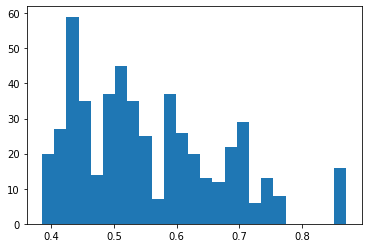

In [18]:
data_ = boston_frame['NOX']
print(np.mean(data_), np.std(data_), data_.size)
plt.hist(data_, bins = 25)
plt.show()

Минимальный размер подвыборки: 222

       mean       std  size
0  0.554695  0.115763   506
1  0.549039  0.111724   222

Разность средних значений = 0.006
Заданный доверительный интервал = 0.02


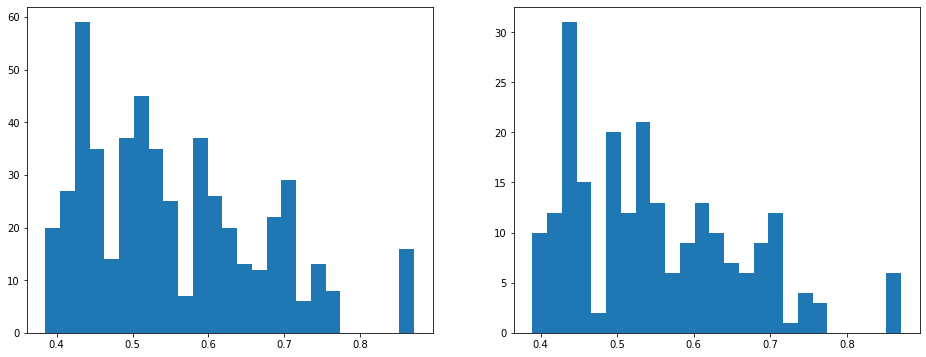

In [19]:
data_test = gen_subsample_2(data_, 0.01, 0.02, 25)

3.613523557312254 8.59304135129577 506


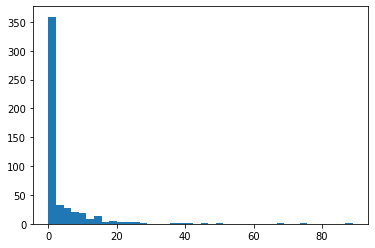

In [20]:
# признак с распределением, сильно отличающимся от нормального
data_nenorm = boston_frame['CRIM']
print(np.mean(data_nenorm), np.std(data_nenorm), data_nenorm.size)
plt.hist(data_nenorm, bins = 40)
plt.show()

Минимальный размер подвыборки: 284

       mean       std  size
0  3.613524  8.593041   506
1  3.741985  7.811250   284

Разность средних значений = 0.128
Заданный доверительный интервал = 1


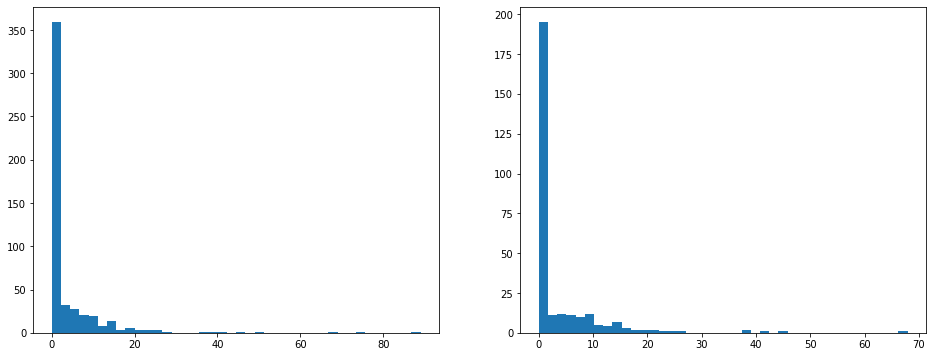

In [21]:
data_nenorm_test = gen_subsample_2(data_nenorm, 0.05, 1, 40)

* Можно проверить, что в большинстве случаев (с заданным p-value), разность средних значений лежит внутри заданного дворетельного интервала - это подтверждает приведенные выше утверждения

##### Категорильный признак

[ 1.  2.  3.  4.  5.  6.  7.  8. 24.]


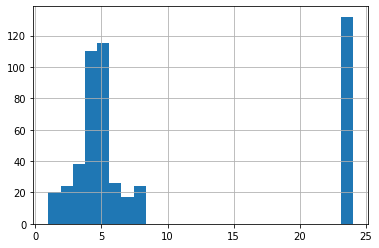

In [22]:
data_cat = boston_frame['RAD']
data_cat.hist(bins = 25)
print(np.unique(data_cat.values))

58 69 107 261 270 75 50 69 296
n = 296


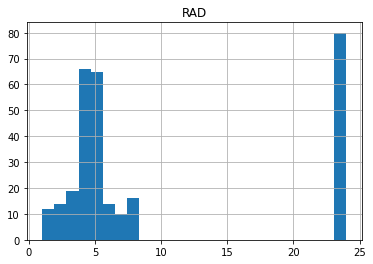

In [23]:
enc = OneHotEncoder()
d_test = np.array(data_cat).reshape(-1,1)
d_trans = pd.DataFrame(enc.fit_transform(d_test).toarray())

n_max = []
for i in range(9):
    data_ = d_trans[i]
    n_max.append(min_n(data_, 0.05, 0.05))
print(' '.join(str(i) for i in n_max))
data_cat_new = gen_subsample(data_cat, max(n_max))
data_cat_new.hist(bins = 25)
print('n =', data_cat_new.size)

In [24]:
#относительные частоты в исходной выборке и подвыборке
print(data_cat.value_counts(normalize=True))
print()
print(data_cat_new['RAD'].value_counts(normalize=True))

24.0    0.260870
5.0     0.227273
4.0     0.217391
3.0     0.075099
6.0     0.051383
8.0     0.047431
2.0     0.047431
1.0     0.039526
7.0     0.033597
Name: RAD, dtype: float64

24.0    0.270270
4.0     0.222973
5.0     0.219595
3.0     0.064189
8.0     0.054054
6.0     0.047297
2.0     0.047297
1.0     0.040541
7.0     0.033784
Name: RAD, dtype: float64


* Для категориального признака в виду грубой оценки n сверху, получаем подвыборку, с распределением и относительными частотами, близкими к исходной выборке.

Минимальный размер подвыборки: 15

       mean       std  size
0  0.039526  0.194842   506
1  0.000000  0.000000    15

Разность средних значений = 0.04
Заданный доверительный интервал = 0.1
Минимальный размер подвыборки: 17

       mean       std  size
0  0.047431  0.212559   506
1  0.000000  0.000000    17

Разность средних значений = 0.047
Заданный доверительный интервал = 0.1
Минимальный размер подвыборки: 27

       mean       std  size
0  0.075099  0.263551   506
1  0.074074  0.261891    27

Разность средних значений = 0.001
Заданный доверительный интервал = 0.1
Минимальный размер подвыборки: 65

       mean       std  size
0  0.217391  0.412471   506
1  0.184615  0.387985    65

Разность средних значений = 0.033
Заданный доверительный интервал = 0.1
Минимальный размер подвыборки: 67

       mean       std  size
0  0.227273  0.419070   506
1  0.238806  0.426354    67

Разность средних значений = 0.012
Заданный доверительный интервал = 0.1
Минимальный размер подвыборки: 19

      

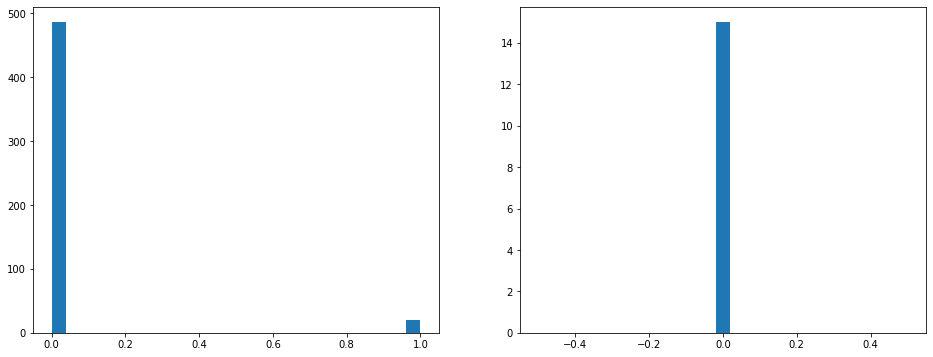

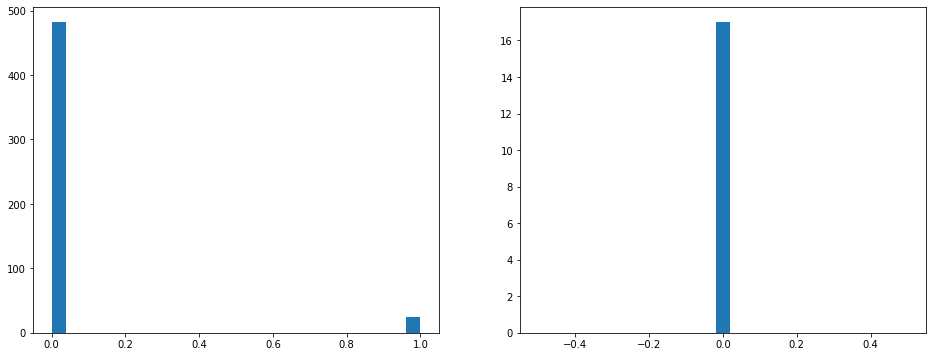

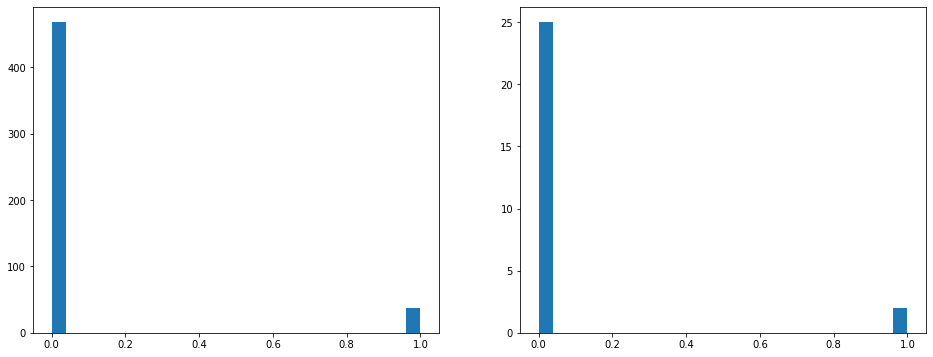

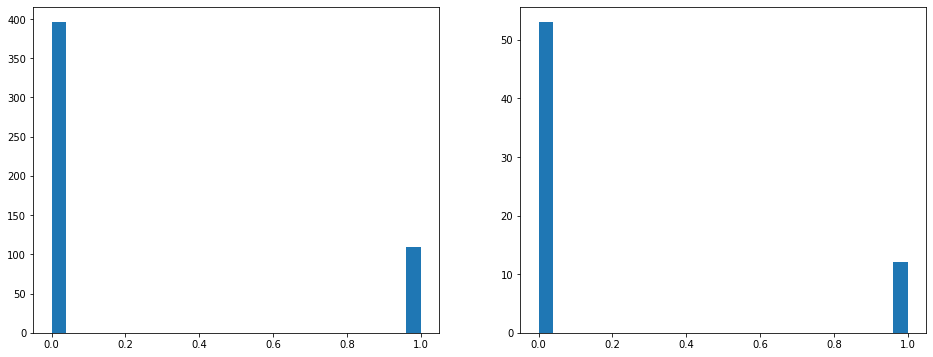

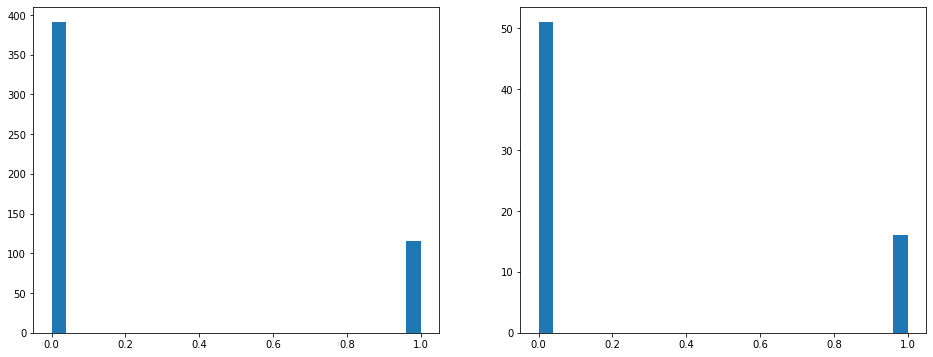

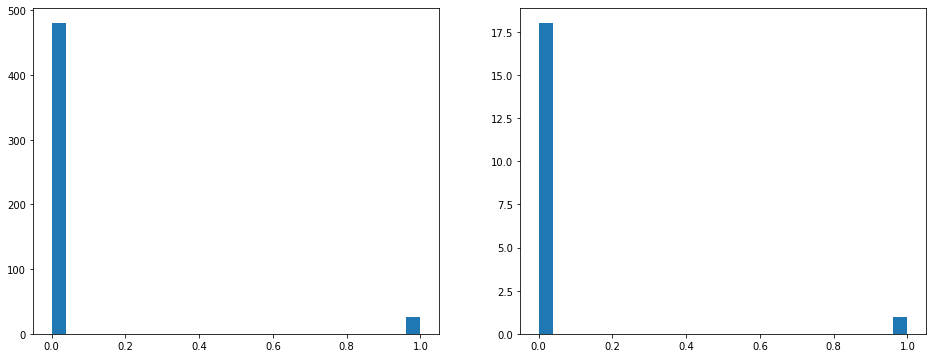

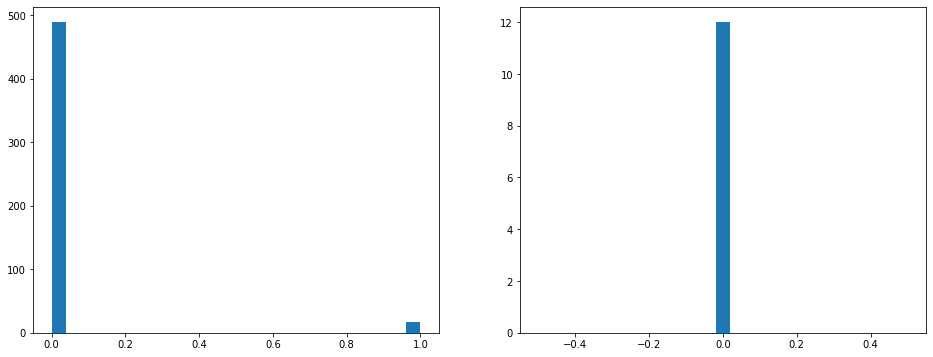

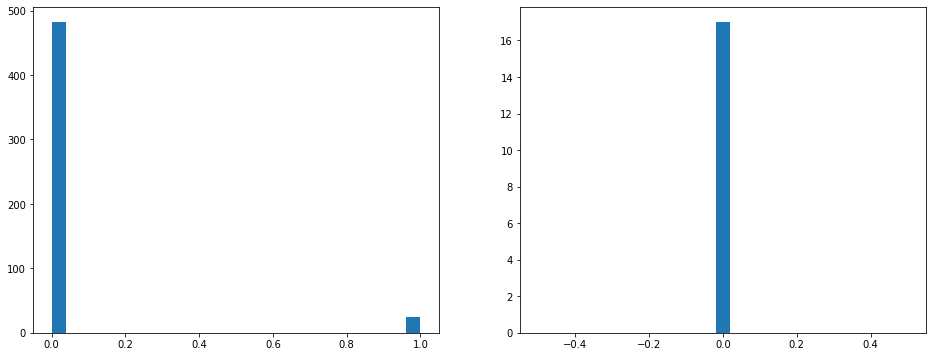

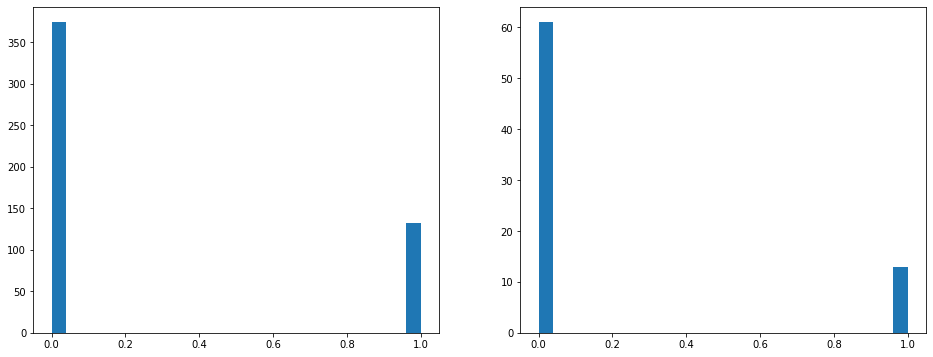

In [25]:
# проверка метода для каждого нового признака отдельно
# новый признак - признак полученный с помощью OneHotEncoder
for i in range(9):
    data_ = d_trans[i]
    gen_subsample_2(data_, 0.05, 0.1, 25)

### Дополнение - другие инструменты для обнаружения дрейфа данных

* [scikit-multiflow](https://scikit-multiflow.readthedocs.io/en/stable/index.html)

In [26]:
!pip install scikit-multiflow

In [27]:
! pip install -U Cython

Раздел skmultiflow.drift_detection содержит несколько функций (в них используются разные мат. подходы) для определения детекции аномалий в распределении (одномерный массив). В самой библиотеки раздел указан как "module includes methods for Concept Drift Detection". Каждая из функций позволяет находить в распределении аномальные объекты. Помимо них детектируются объекты находящиеся в "опасной зоне", т.е. которые могут быть аномальными. В качестве примера приведен код для функции [DDM](https://scikit-multiflow.readthedocs.io/en/stable/api/generated/skmultiflow.drift_detection.DDM.html?highlight=ddm), для остальных функций все выглядит также с точностью до параметров самой модели

In [28]:
from skmultiflow.drift_detection import DDM
ddm = DDM()
# Simulating a data stream as a normal distribution of 1's and 0's
data_stream = np.random.randint(2, size=2000)
# Changing the data concept from index 999 to 1500, simulating an 
# increase in error rate
for i in range(999, 1500):
    data_stream[i] = 0
# Adding stream elements to DDM and verifying if drift occurred
for i in range(2000):
    ddm.add_element(data_stream[i])
    if ddm.detected_warning_zone():
        print('Warning zone has been detected in data: ' + str(data_stream[i]) + ' - of index: ' + str(i))
    if ddm.detected_change():
        print('Change has been detected in data: ' + str(data_stream[i]) + ' - of index: ' + str(i))


Warning zone has been detected in data: 1 - of index: 96
Warning zone has been detected in data: 1 - of index: 97
Warning zone has been detected in data: 0 - of index: 98
Warning zone has been detected in data: 1 - of index: 99
Warning zone has been detected in data: 0 - of index: 100
Warning zone has been detected in data: 1 - of index: 101
Warning zone has been detected in data: 0 - of index: 102
Warning zone has been detected in data: 1 - of index: 106
Warning zone has been detected in data: 1 - of index: 108
Warning zone has been detected in data: 1 - of index: 112
Warning zone has been detected in data: 1 - of index: 121
Warning zone has been detected in data: 1 - of index: 122
Warning zone has been detected in data: 1 - of index: 123
Warning zone has been detected in data: 0 - of index: 124
Warning zone has been detected in data: 1 - of index: 125
Warning zone has been detected in data: 1 - of index: 126
Warning zone has been detected in data: 0 - of index: 127
Warning zone has b

* [data-drift-detector](https://pypi.org/project/data-drift-detector/#description)

Библиотека предоставляет методы для сравнения распределений в двух датасетах. Признаки сравниваются с помощью [jensen shannon metric](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B2%D0%B5%D1%80%D0%B3%D0%B5%D0%BD%D1%86%D0%B8%D1%8F_%D0%99%D0%B5%D0%BD%D1%81%D0%B5%D0%BD%D0%B0_%E2%80%94_%D0%A8%D0%B5%D0%BD%D0%BD%D0%BE%D0%BD%D0%B0), также есть возможность быстро построить графики из seaborn для визуального анализа. Последний метод позволяет оценить эффективность ml-модели.

In [29]:
!pip install data_drift_detector

In [30]:
from data_drift_detector import DataDriftDetector

target = ['target'] # целевой признак
numerical_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'] # вещественные признаки
categorical_features = ['CHAS', 'RAD'] #категориальные признаки 

# initialize detector (на вход поступает два датасета, списки категориальных и вещественных признаков)
# чтобы в дальнейшем воспользоваться методом compare_ml_efficacy, приходится присоединять таргет к остальным признакам
detector = DataDriftDetector(df_prior = boston_frame[200:], df_post = boston_frame[:200], 
                             categorical_columns = categorical_features, numeric_columns = numerical_features+target)


# вычисление расстояний между распределениями для каждого признака
# с помощью дивергенции Йенсена — Шеннона (jensen shannon metric)
detector.calculate_drift()

[('CRIM', 0.6017086312900668),
 ('RAD', 0.5108878141419553),
 ('TAX', 0.43298803687376636),
 ('NOX', 0.297923582151775),
 ('PTRATIO', 0.24115795472815663),
 ('B', 0.23481381138610435),
 ('INDUS', 0.22772158695616843),
 ('target', 0.16697146618184772),
 ('RM', 0.12756230981521427),
 ('DIS', 0.12427146745749065),
 ('LSTAT', 0.10541111765973468),
 ('CHAS', 0.08345072993036923),
 ('ZN', 0.06084975108771914),
 ('AGE', 0.01879439476347037)]

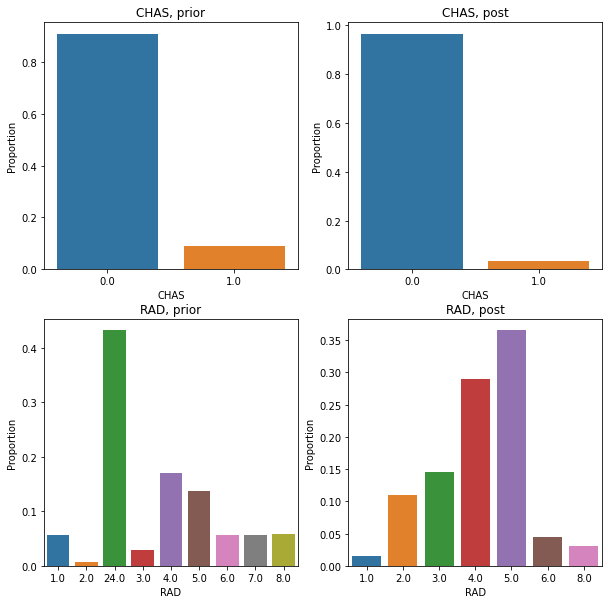

In [31]:
# гистограмма для категориальных признаков для двух датасетов
detector.plot_categorical(categorical_features)

# попарные графики вещественных признаков для двух датасетов
#detector.plot_numeric_to_numeric(numerical_features)

# попарные графики между категориальными и вещественными признаками для двух датасетов
#detector.plot_categorical_to_numeric(categorical_features, numerical_features)

No handles with labels found to put in legend.


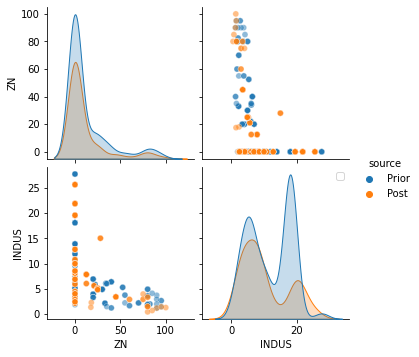

In [32]:
detector.plot_numeric_to_numeric(['ZN', 'INDUS'], alpha = 0.5)

In [ ]:
# сравнение распределений target с помощью метрик MAE, RMSE, R2
detector.compare_ml_efficacy(target_column='target')

* [modeldrift](https://github.com/joelcthomas/modeldrift)

Прототип по созданию модели, мониторингу её дрейфа для последующего переобучения и развертывания. Пример на платформе Azure можно посмотреть [здесь](https://community.cloud.databricks.com/?o=8176730813705061#notebook/910120191055537/command/910120191055625)
#### Краткий алгоритм принципа работы с инструментом:
1. Тренировка разных моделей (Random Forest, Decision Tree, XGBoost) и подбор лучших гиперпараметров
2. Выбор лучшей модели и её развертывание
3. Оценка работы модели
4. Мониторинг показателей, получение обратной связи 
* появление дрейфа KPI после поступления в систему новых данных
5. Переобучение модели с учетом новых данных (п. 1-3) 
* Далее продолжается мониторинг и в случае обнаружения дрейфа описанный выше алгоритм повторяется

#### Установка расширения (не работает)

In [ ]:
#!pip install jupyter_contrib_nbextensions

In [ ]:
#! jupyter contrib nbextension install --sys-prefix --overwrite

In [ ]:
#!pip show jupyter_contrib_nbextensions

In [ ]:
#!jupyter nbextension install --sys-prefix --symlink --overwrite --py evidently

In [ ]:
#!jupyter nbextension enable evidently --py --sys-prefix

In [ ]:
#boston_data_drift_report.show() # тест